# Practice Session 08: Communities

<font size="3" color="blue">Nil Tomàs Plans, U214575, 13/11/2023</font>

In [77]:
# LEAVE AS-IS

import io
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import statistics

# 1. The graph

In [78]:
# LEAVE AS-IS

INPUT_GRAPH_FILENAME = "got.graphml"

# Read the graph in GraphML format
graph_in = nx.read_graphml(INPUT_GRAPH_FILENAME)

# Re-label the nodes so they use the 'name' as label
graph_relabeled = nx.relabel.relabel_nodes(graph_in, dict(graph_in.nodes(data='name')))

# Convert the graph to undirected
graph = graph_relabeled.to_undirected()

In [79]:
# LEAVE AS-IS (OR MODIFY VISUALLY)

def plot_graph(g, width=20, height=20, font_size=12, partition=None):

    # Create a plot of width x height
    plt.figure(figsize=(width, height))

    # By default the partition is going to be all nodes in the same partition
    if partition is None:
        partition = [ set(g.nodes()) ]
        
    # Number of partitions
    num_parts = len(partition)
    
    # Create a map from nodes to color using color values from 0.0 for the first partition
    # to 1-1/P for the last partition, assuming there are P partitions
    node_to_color = {}
    part_color = 0.0
    for part in partition:
        for node in part:
            node_to_color[node] = part_color
        part_color += 1.0/num_parts
    
    # Create a list of colors in the ordering of the nodes
    colors = [node_to_color[node] for node in g.nodes()]
    
    # Layout the nodes using a spring model
    nx.draw_spring(g, with_labels=True, node_size=1000, font_size=font_size,
                   cmap=plt.get_cmap('YlOrRd'), node_color=colors)

    # Display
    plt.show()

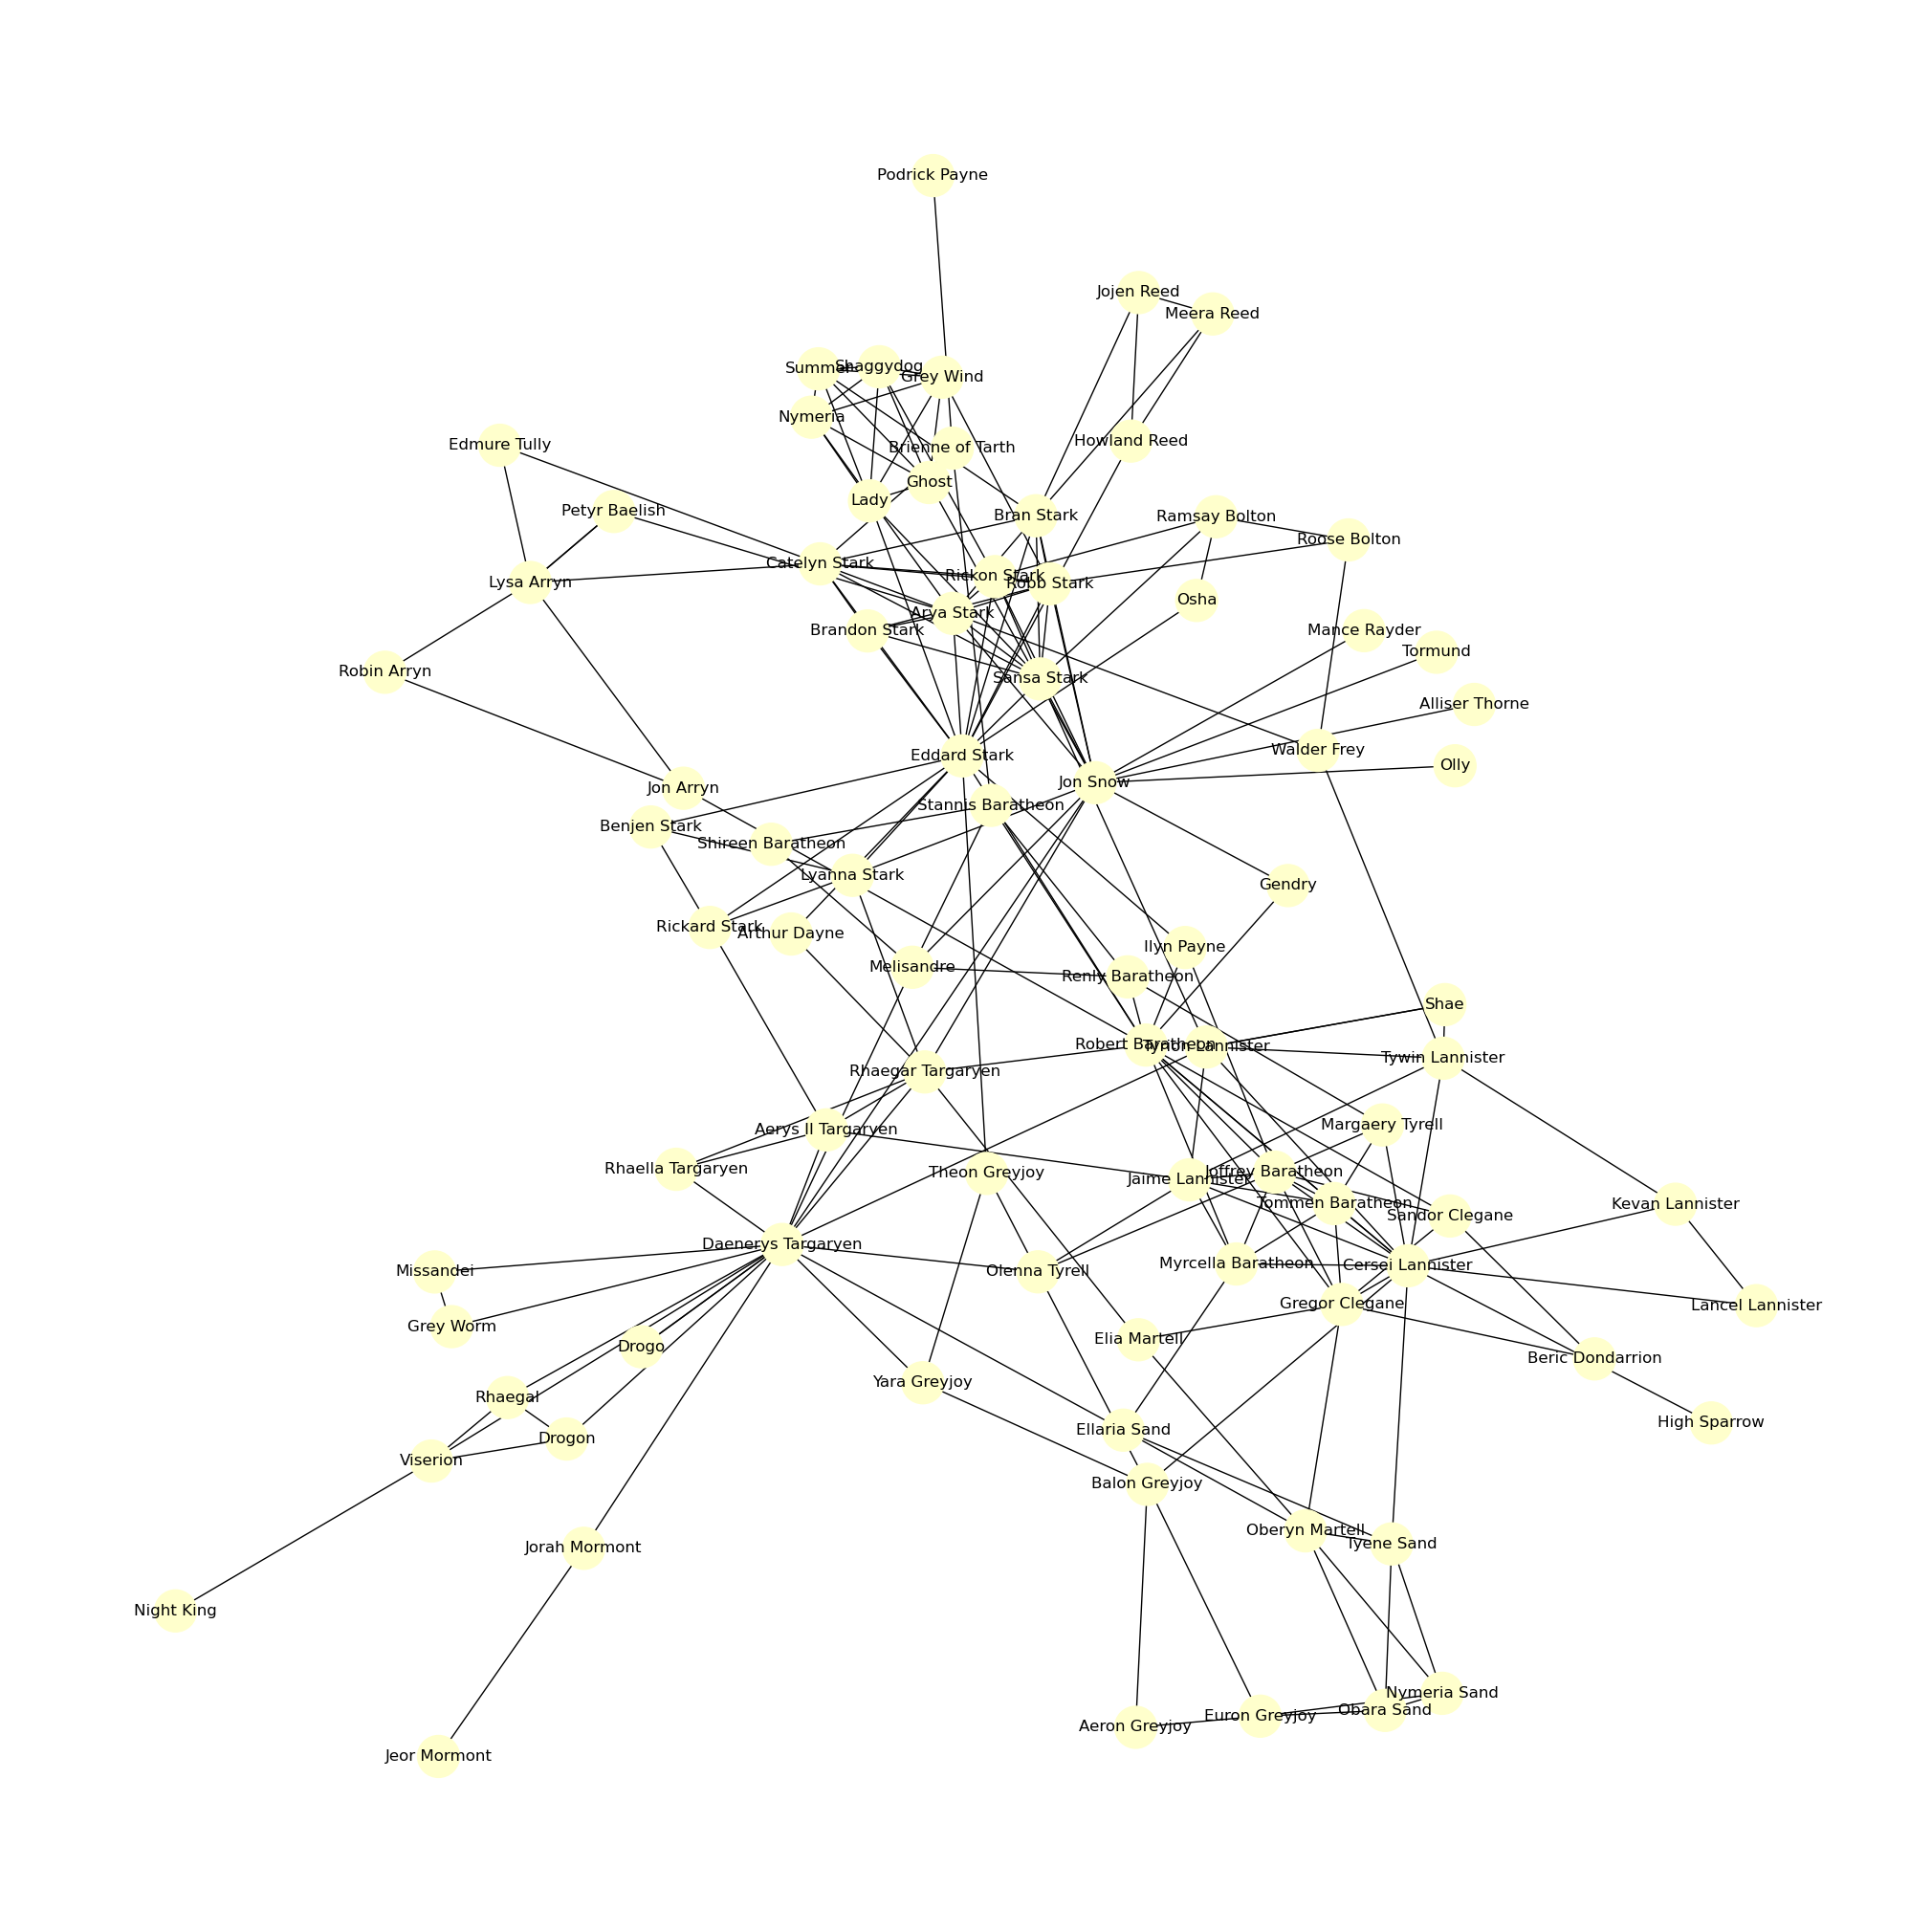

In [80]:
# LEAVE AS-IS

plot_graph(graph)

# 2. K-core decomposition

In [81]:
# LEAVE AS-IS

def get_max_degree(g):
    degree_sequence = [x[1] for x in g.degree()]
    return(max(degree_sequence))


def nodes_with_degree_less_or_equal_than(g, degree):
    nodes = []
    for node in g.nodes():
        if g.degree(node) <= degree:
            nodes.append(node)
    return nodes

In [82]:
def kcore_decomposition(graph):
    g = graph.copy()
    max_degree = get_max_degree(g)

    node_to_level = {}
    for level in range(1, max_degree + 1):

        while True:
            # Obtain the list of nodes with degree <= level
            nodes_in_level = nodes_with_degree_less_or_equal_than(g, level)

            # Check if this list is empty
            if len(nodes_in_level) == 0:
                break    #volem que no fagi res
              
            # If the list is not empty, assign the nodes to the
            # corresponding level and remove the node
            for node in nodes_in_level:
                node_to_level[node] = level #assignem el node al correspondent level
                g.remove_node(node)#eliminem el node
                
    return(node_to_level)

In [83]:
# LEAVE AS-IS

node_to_kcore = kcore_decomposition(graph)

for character in ["Jon Snow", "Tyrion Lannister", "Night King"]:
    print("K-core of {:s}: {:d}".format(character, node_to_kcore[character]))

K-core of Jon Snow: 6
K-core of Tyrion Lannister: 3
K-core of Night King: 1


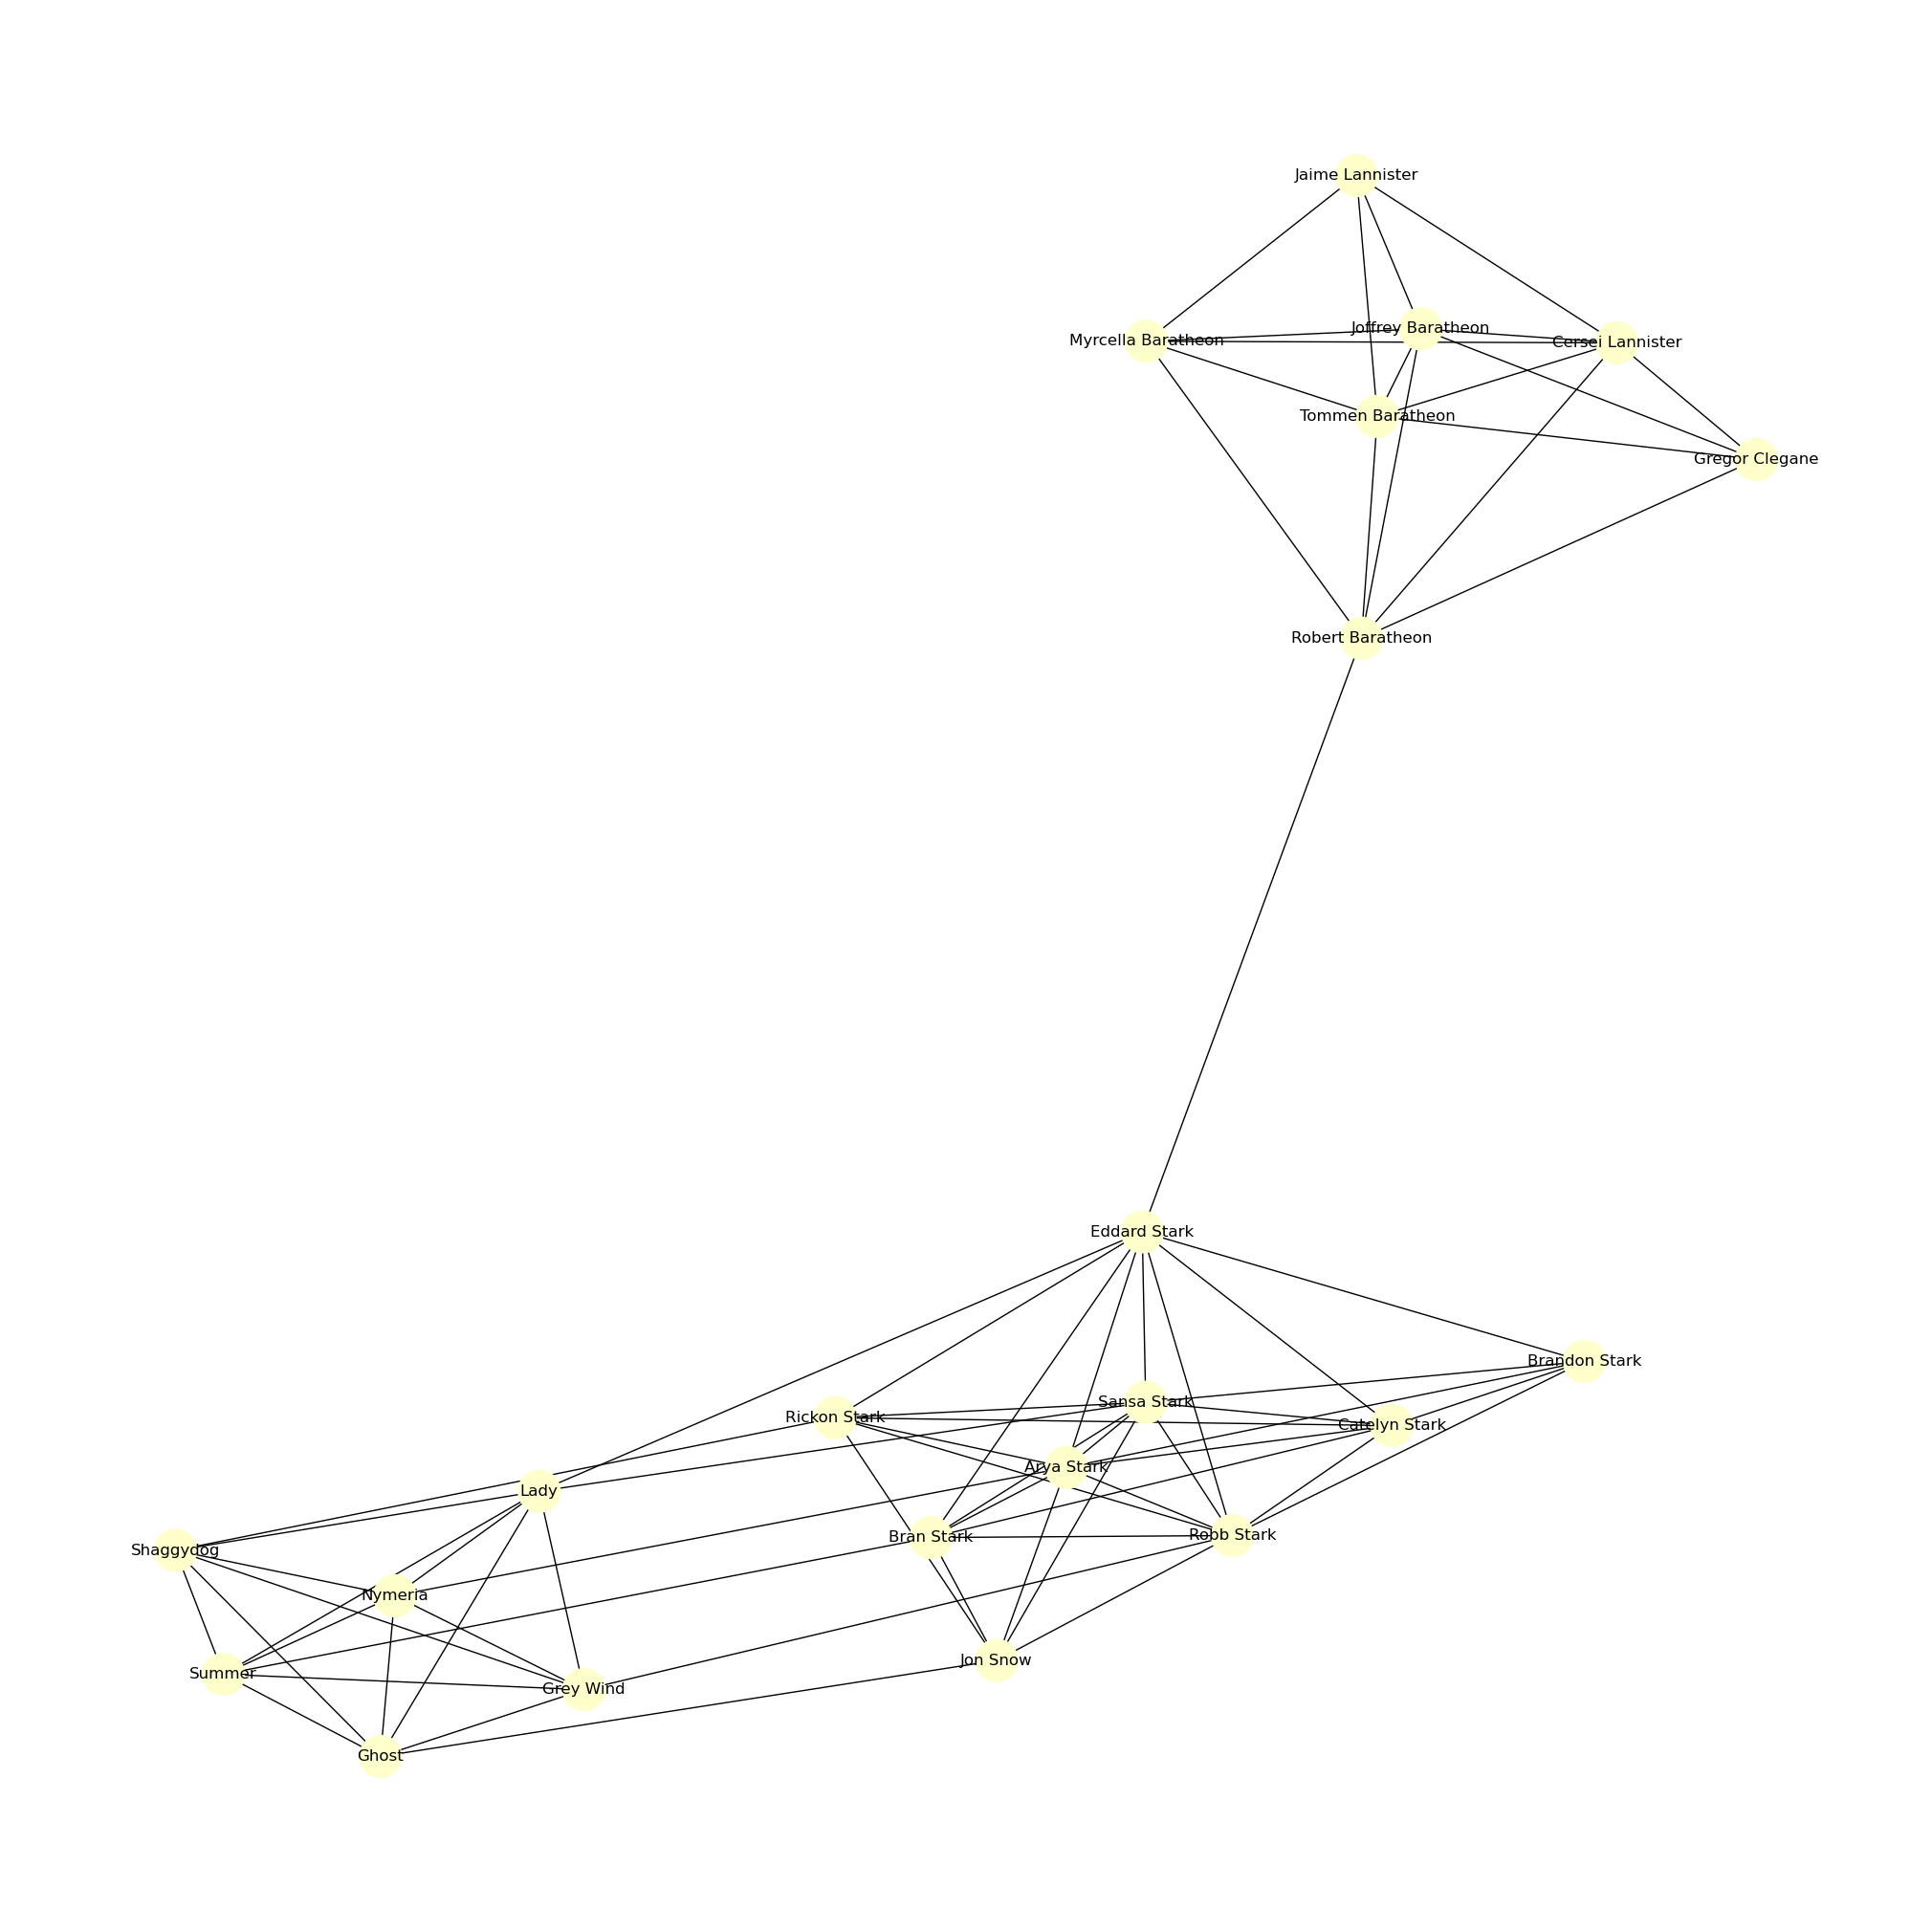

In [84]:
#cell to create and draw a sub-graph named graphcore, containing only the nodes with k-core number greater or equal to 4
llista_nodes = []


for node, kcore in node_to_kcore.items(): #iterem cada node i el seu k-core al diccionari de la cela anterior node_to_kcore
    if kcore >= 4:#com que volem que el graf només contingui k-core major o igual a 4, li afegim aquesta condició
        # afegim el node a la llista de nodes
        llista_nodes.append(node)

#creem el subgraf graphcore que conté la llista de nodes amb kcore>=4
graphcore = graph.subgraph(llista_nodes)

# Dibuixem el graf
plot_graph(graphcore)

<font size="+1" color="Blue">Puc veure que el graf està agrupat en 3 famílies de la serie de joc de trons. Les relacions de les famílies amb les dues altres té diferents grau del coeficient de clustering. Observo que entre els Stark i els baratheon només els connecta un enllaç mentre's que la Stark i la tercera família tenen molts enllaços que els connecten. En resum, el coeficient de clustering varia entre les famílies
</font>

# 3. Modularity of a partition

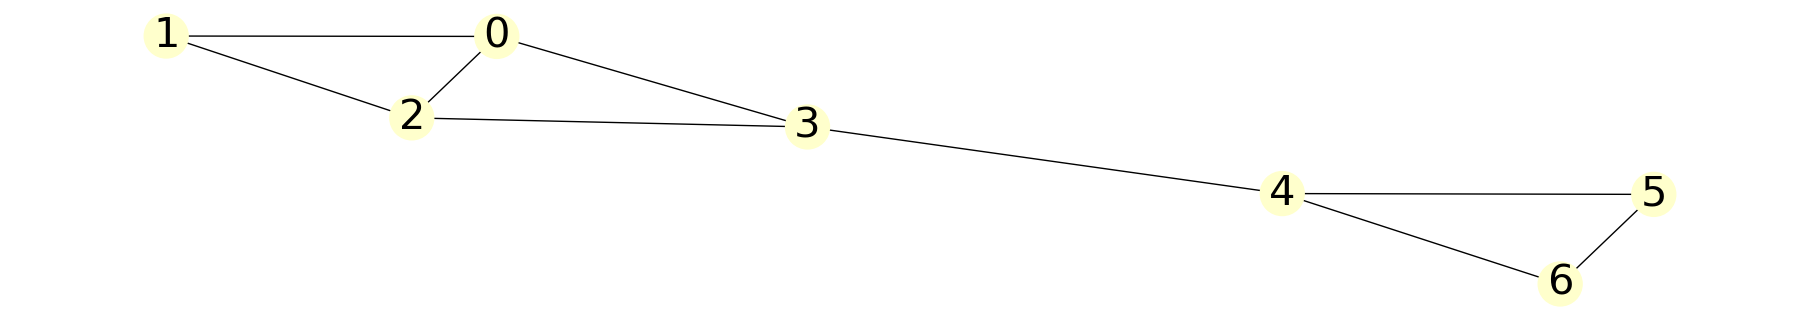

In [85]:
# Leave as-is

g = nx.Graph()

g.add_edge(0, 1)
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(3, 0)
g.add_edge(0, 2)
g.add_edge(3, 4)
g.add_edge(4, 5)
g.add_edge(5, 6)
g.add_edge(6, 4)

plot_graph(g, height=3, width=18, font_size=30)

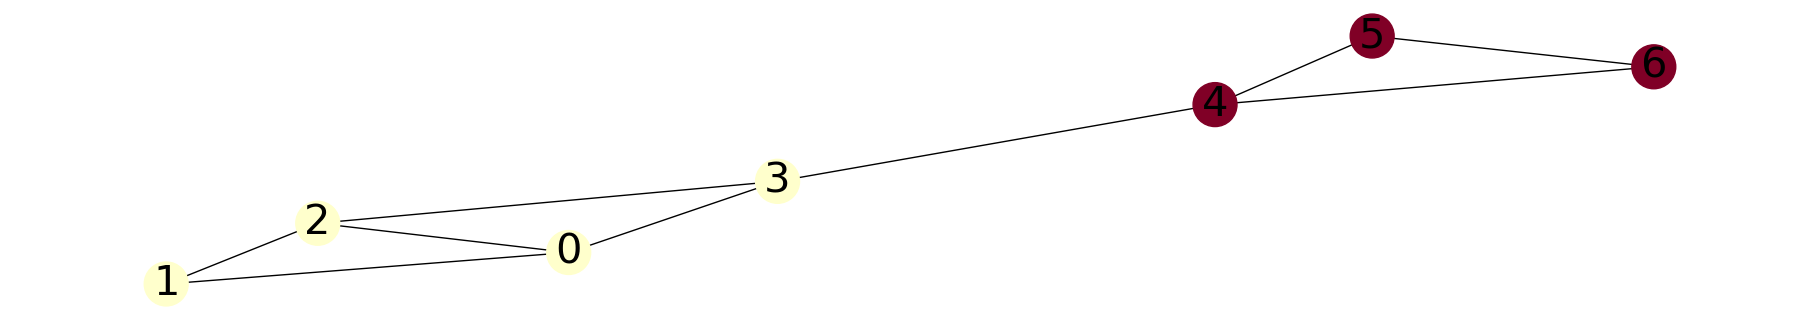

Modularity of partition 1 according to NetworkX: 0.3642


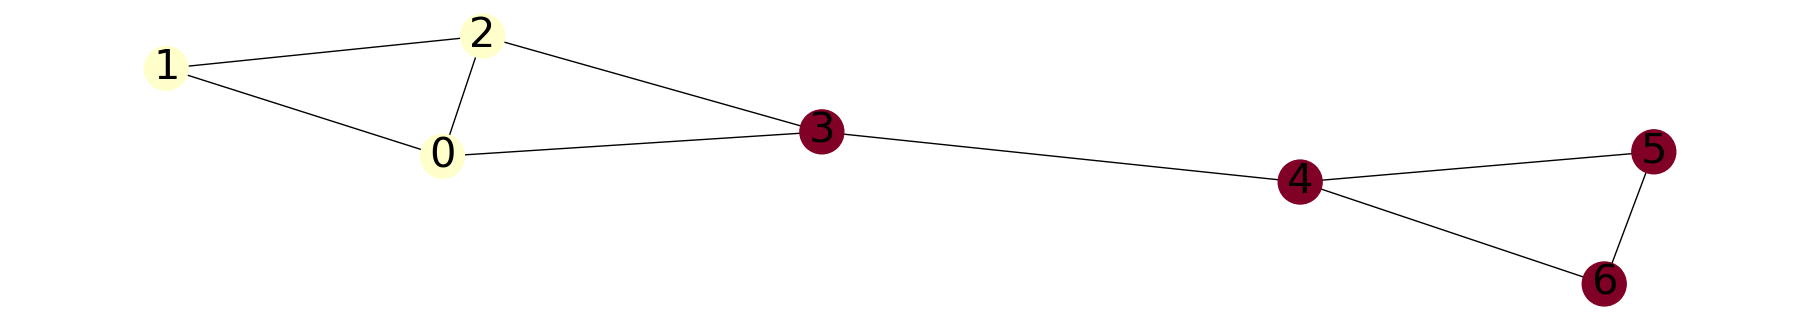

Modularity of partition 2 according to NetworkX: 0.2716


In [86]:
# LEAVE AS-IS

partition1 = [
    {0, 1, 2, 3},
    {4, 5, 6}
]
plot_graph(g, height=3, width=18, font_size=30, partition=partition1)
print("Modularity of partition 1 according to NetworkX: %.4f" % nx.community.quality.modularity(g, partition1))


partition2 = [
    {0, 1, 2},
    {3, 4, 5, 6}
]
plot_graph(g, height=3, width=18, font_size=30, partition=partition2)
print("Modularity of partition 2 according to NetworkX: %.4f" % nx.community.quality.modularity(g, partition2))

Create a function `modularity(g, partition)`. First, define two auxiliary functions:

* `Lc(g, C)`, returning the number of internal links within community C. An easy way of doing this is creating a [subgraph](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html) of g restricted to the nodes in C, and then counting the [number of edges](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.number_of_edges.html) in that subgraph.
* `kc(g, C)`, returning the sumation of the degree of nodes in C in the graph g (do not create a subgraph).

Then, write the function `modularity` using these two auxiliary functions.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

In [87]:
#cell with your code for `Lc(g, C)`, for `kc(g, C)` and for `modularity(g, partition)'

def Lc(g, C):#Lc
    subgraph = g.subgraph(C) #creo el subgraf de g només amb els nodes de C
    internal_links = subgraph.number_of_edges()#conto el numero d'enllaços en el subgraf
    return internal_links #retornem el numero d'enllaços


def kc(g, C):#kc
    degree_sum = sum(g.degree(node) for node in C)#faig un sumatori del grau dels nodes de C del graf g i retornem el valor a la seguent línia
    return degree_sum


def modularity(g, partition):
    total_links = g.number_of_edges()
    modularity_value = 0.0#inicio a 0 la modularitat

    for community in partition:
        # Calcula el nombre d'enllaços interns dins de la comunitat
        lc = Lc(g, community)

        # Calcula la suma del grau dels nodes dins de la comunitat
        kc_value = kc(g, community)

        # Actualitza el valor de modularitat utilitzant la fórmula 
        modularity_value += (lc / total_links) - ((kc_value / (2 * total_links)) ** 2)

    return modularity_value

In [88]:
# LEAVE AS-IS

print("Modularity of partition 1: mine={:.6f}, networkx={:.6f}".format(
    modularity(g, partition1), nx.community.quality.modularity(g, partition1)))

print("Modularity of partition 2: mine={:.6f}, networkx={:.6f}".format(
    modularity(g, partition2), nx.community.quality.modularity(g, partition2)))


Modularity of partition 1: mine=0.364198, networkx=0.364198
Modularity of partition 2: mine=0.271605, networkx=0.271605


# 4. Girvan-Newman algorithm

## 4.1. Find the edge with the largest betweenness

In [89]:
#code for largest_betweenness_edge, using the edge_betweenness_centrality function in NetworkX
def largest_betweenness_edge(graph):
    edge_betweenness = nx.edge_betweenness_centrality(graph)#calculo el edge_betweenness
    # Iterate through keys and find the edge with the maximum betweenness
    max_betweenness_edge = max(edge_betweenness, key=edge_betweenness.get)# itero sobre les claus del diccionari per a trobar el edge_betweenness més alt

    
    if len(max_betweenness_edge) == 3:#si la key té 3 elements, retorno només els 2 primers
        max_betweenness_edge = max_betweenness_edge[:2]
    return max_betweenness_edge



In [90]:
# LEAVE AS-IS
# The answer should be pretty obvious, considering the graph

print(largest_betweenness_edge(g))

(3, 4)


## 4.2. Iteratively remove the edge with the largest betweenness

In [91]:
# LEAVE AS-IS

def list_connected_components(g):
    return list(nx.connected_components(g))

def number_connected_components(g):
    return len(list_connected_components(g))


In [92]:
#code for girvan_newman following the template above
def girvan_newman(orig):
    # Copia del graf original
    g = orig.copy()
    partition_sequence = [list_connected_components(g)]#Tots els nodes d'una partició, conformaran la primera partició a crear
    
    # Compute the number of connected components
    Ncomp = number_connected_components(g)
    
    #  Com que encara no em arribat a la situacó on cada node és un singleton
    while Ncomp < g.number_of_nodes():
        
        # Find an edge to remove and remove it
        edge_to_remove = largest_betweenness_edge(g)
        g.remove_edge(*edge_to_remove)
        
        # Recompute the new number of connected components (ncomp_new)
        Ncomp_new = number_connected_components(g)
        
        # If the number of connected components has increased
        if Ncomp_new > Ncomp:
            
            # Add to the partition sequence the list of connected components
            partition_sequence.append(list_connected_components(g))
            
            # Update the number of connected components
            Ncomp = Ncomp_new

    return partition_sequence 

In [93]:
# LEAVE AS-IS

def run_girvan_newman(g):

    partitions = girvan_newman(g)
    modularity_profile = []    
    for partition in partitions:
        print("Partition %s" % (partition,) )
        m = modularity(g, partition)
        print("Modularity: %.4f" % m)
        modularity_profile.append(m)
        print()  
        
    plt.xlabel("Iteration")
    plt.ylabel("Modularity")
    plt.title("Modularity profile")
    plt.plot(modularity_profile)

Partition [{0, 1, 2, 3, 4, 5, 6}]
Modularity: 0.0000

Partition [{0, 1, 2, 3}, {4, 5, 6}]
Modularity: 0.3642

Partition [{0, 2, 3}, {1}, {4, 5, 6}]
Modularity: 0.2531

Partition [{0}, {1}, {2, 3}, {4, 5, 6}]
Modularity: 0.1420

Partition [{0}, {1}, {2}, {3}, {4, 5, 6}]
Modularity: 0.0864

Partition [{0}, {1}, {2}, {3}, {4}, {5, 6}]
Modularity: -0.0617

Partition [{0}, {1}, {2}, {3}, {4}, {5}, {6}]
Modularity: -0.1481



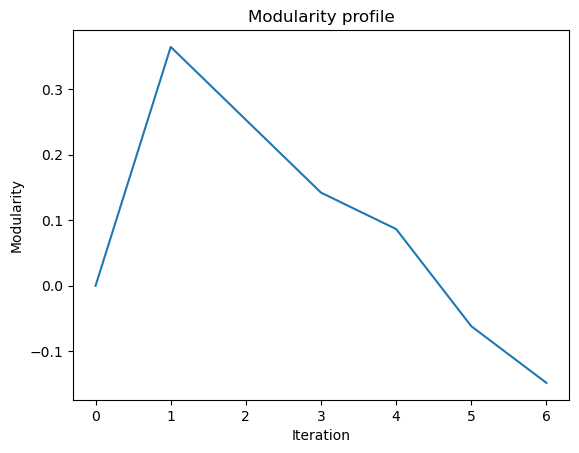

In [94]:
# LEAVE AS-IS

run_girvan_newman(g)

Partition [{'Brienne of Tarth', 'Osha', 'Tyene Sand', 'Renly Baratheon', 'Missandei', 'Shaggydog', 'Shireen Baratheon', 'Myrcella Baratheon', 'Melisandre', 'Aerys II Targaryen', 'Obara Sand', 'Arya Stark', 'Eddard Stark', 'Petyr Baelish', 'Jojen Reed', 'Yara Greyjoy', 'Rickon Stark', 'Arthur Dayne', 'Gendry', 'Night King', 'Ellaria Sand', 'Lady', 'Meera Reed', 'Tywin Lannister', 'Sandor Clegane', 'High Sparrow', 'Lancel Lannister', 'Ilyn Payne', 'Robert Baratheon', 'Ghost', 'Robb Stark', 'Margaery Tyrell', 'Theon Greyjoy', 'Viserion', 'Gregor Clegane', 'Jon Arryn', 'Jaime Lannister', 'Walder Frey', 'Joffrey Baratheon', 'Beric Dondarrion', 'Sansa Stark', 'Shae', 'Lysa Arryn', 'Catelyn Stark', 'Daenerys Targaryen', 'Olly', 'Kevan Lannister', 'Aeron Greyjoy', 'Euron Greyjoy', 'Jorah Mormont', 'Elia Martell', 'Balon Greyjoy', 'Roose Bolton', 'Grey Wind', 'Nymeria Sand', 'Robin Arryn', 'Howland Reed', 'Lyanna Stark', 'Oberyn Martell', 'Drogo', 'Rhaegal', 'Tormund', 'Stannis Baratheon', 'Dro

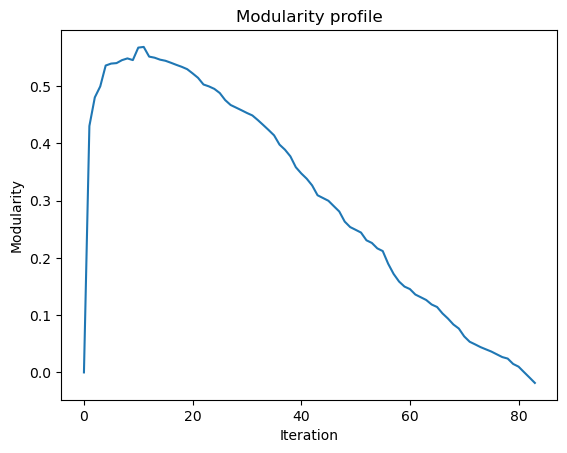

In [95]:
# LEAVE AS-IS

run_girvan_newman(graph)

Partition [{'Robert Baratheon', 'Ghost', 'Summer', 'Shaggydog', 'Myrcella Baratheon', 'Robb Stark', 'Grey Wind', 'Bran Stark', 'Gregor Clegane', 'Cersei Lannister', 'Arya Stark', 'Eddard Stark', 'Tommen Baratheon', 'Jon Snow', 'Rickon Stark', 'Jaime Lannister', 'Nymeria', 'Joffrey Baratheon', 'Sansa Stark', 'Brandon Stark', 'Lady', 'Catelyn Stark'}]
Modularity: 0.0000

Partition [{'Gregor Clegane', 'Cersei Lannister', 'Robert Baratheon', 'Tommen Baratheon', 'Jaime Lannister', 'Myrcella Baratheon', 'Joffrey Baratheon'}, {'Arya Stark', 'Grey Wind', 'Sansa Stark', 'Eddard Stark', 'Ghost', 'Jon Snow', 'Summer', 'Rickon Stark', 'Shaggydog', 'Lady', 'Brandon Stark', 'Nymeria', 'Catelyn Stark', 'Bran Stark', 'Robb Stark'}]
Modularity: 0.3713

Partition [{'Gregor Clegane', 'Cersei Lannister', 'Robert Baratheon', 'Tommen Baratheon', 'Jaime Lannister', 'Myrcella Baratheon', 'Joffrey Baratheon'}, {'Grey Wind', 'Ghost', 'Summer', 'Shaggydog', 'Lady', 'Nymeria'}, {'Arya Stark', 'Sansa Stark', 'Edda

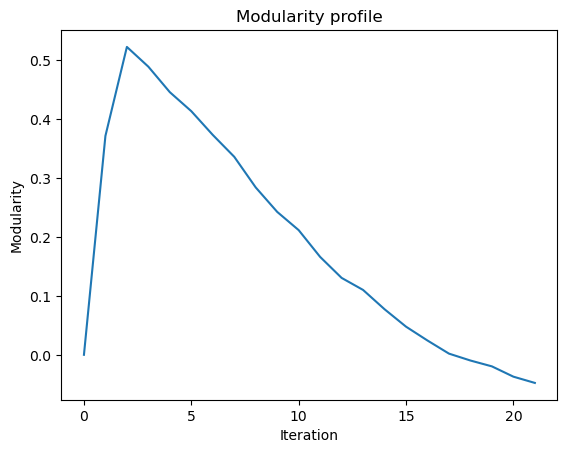

In [96]:
# LEAVE AS-IS

run_girvan_newman(graphcore)

<font size="+1" color="blue">Podem veure que la millor partició és la que té la modularitat més alta que serà la seguent partició [{'Robert Baratheon', 'Cersei Lannister', 'Tommen Baratheon', 'Joffrey Baratheon', 'Myrcella Baratheon', 'Jaime Lannister', 'Gregor Clegane'}, {'Rickon Stark', 'Robb Stark', 'Arya Stark', 'Eddard Stark', 'Jon Snow', 'Sansa Stark', 'Bran Stark', 'Catelyn Stark', 'Brandon Stark'}, {'Nymeria', 'Lady', 'Grey Wind', 'Summer', 'Shaggydog', 'Ghost'}]
Modularity: 0.5222 </font>

In [97]:
def run_girvan_newman_modularity(orig):
    part_sequence=girvan_newman(orig)#executo l'algoritme Girvan_newman 
    
    modularity_score=[modularity(orig,partition) for partition in part_sequence]#calculo la modularitat per a cada partició de la sequence
    max_mod_partition=part_sequence[modularity_score.index(max(modularity_score))]#busco la millor partició que serà la que tingui la modularitat més alta
    return max_mod_partition #retorno al millor partició

In [100]:
# LEAVE AS-IS

def run_and_plot(name, g):
    partition = run_girvan_newman_modularity(g)
    print("The best partition of {:s} has modularity {:.4f} and {:d} communities".format(
        name, modularity(g, partition), len(partition)))
    plot_graph(g, partition=partition)    

The best partition of the entire graph has modularity 0.5684 and 12 communities


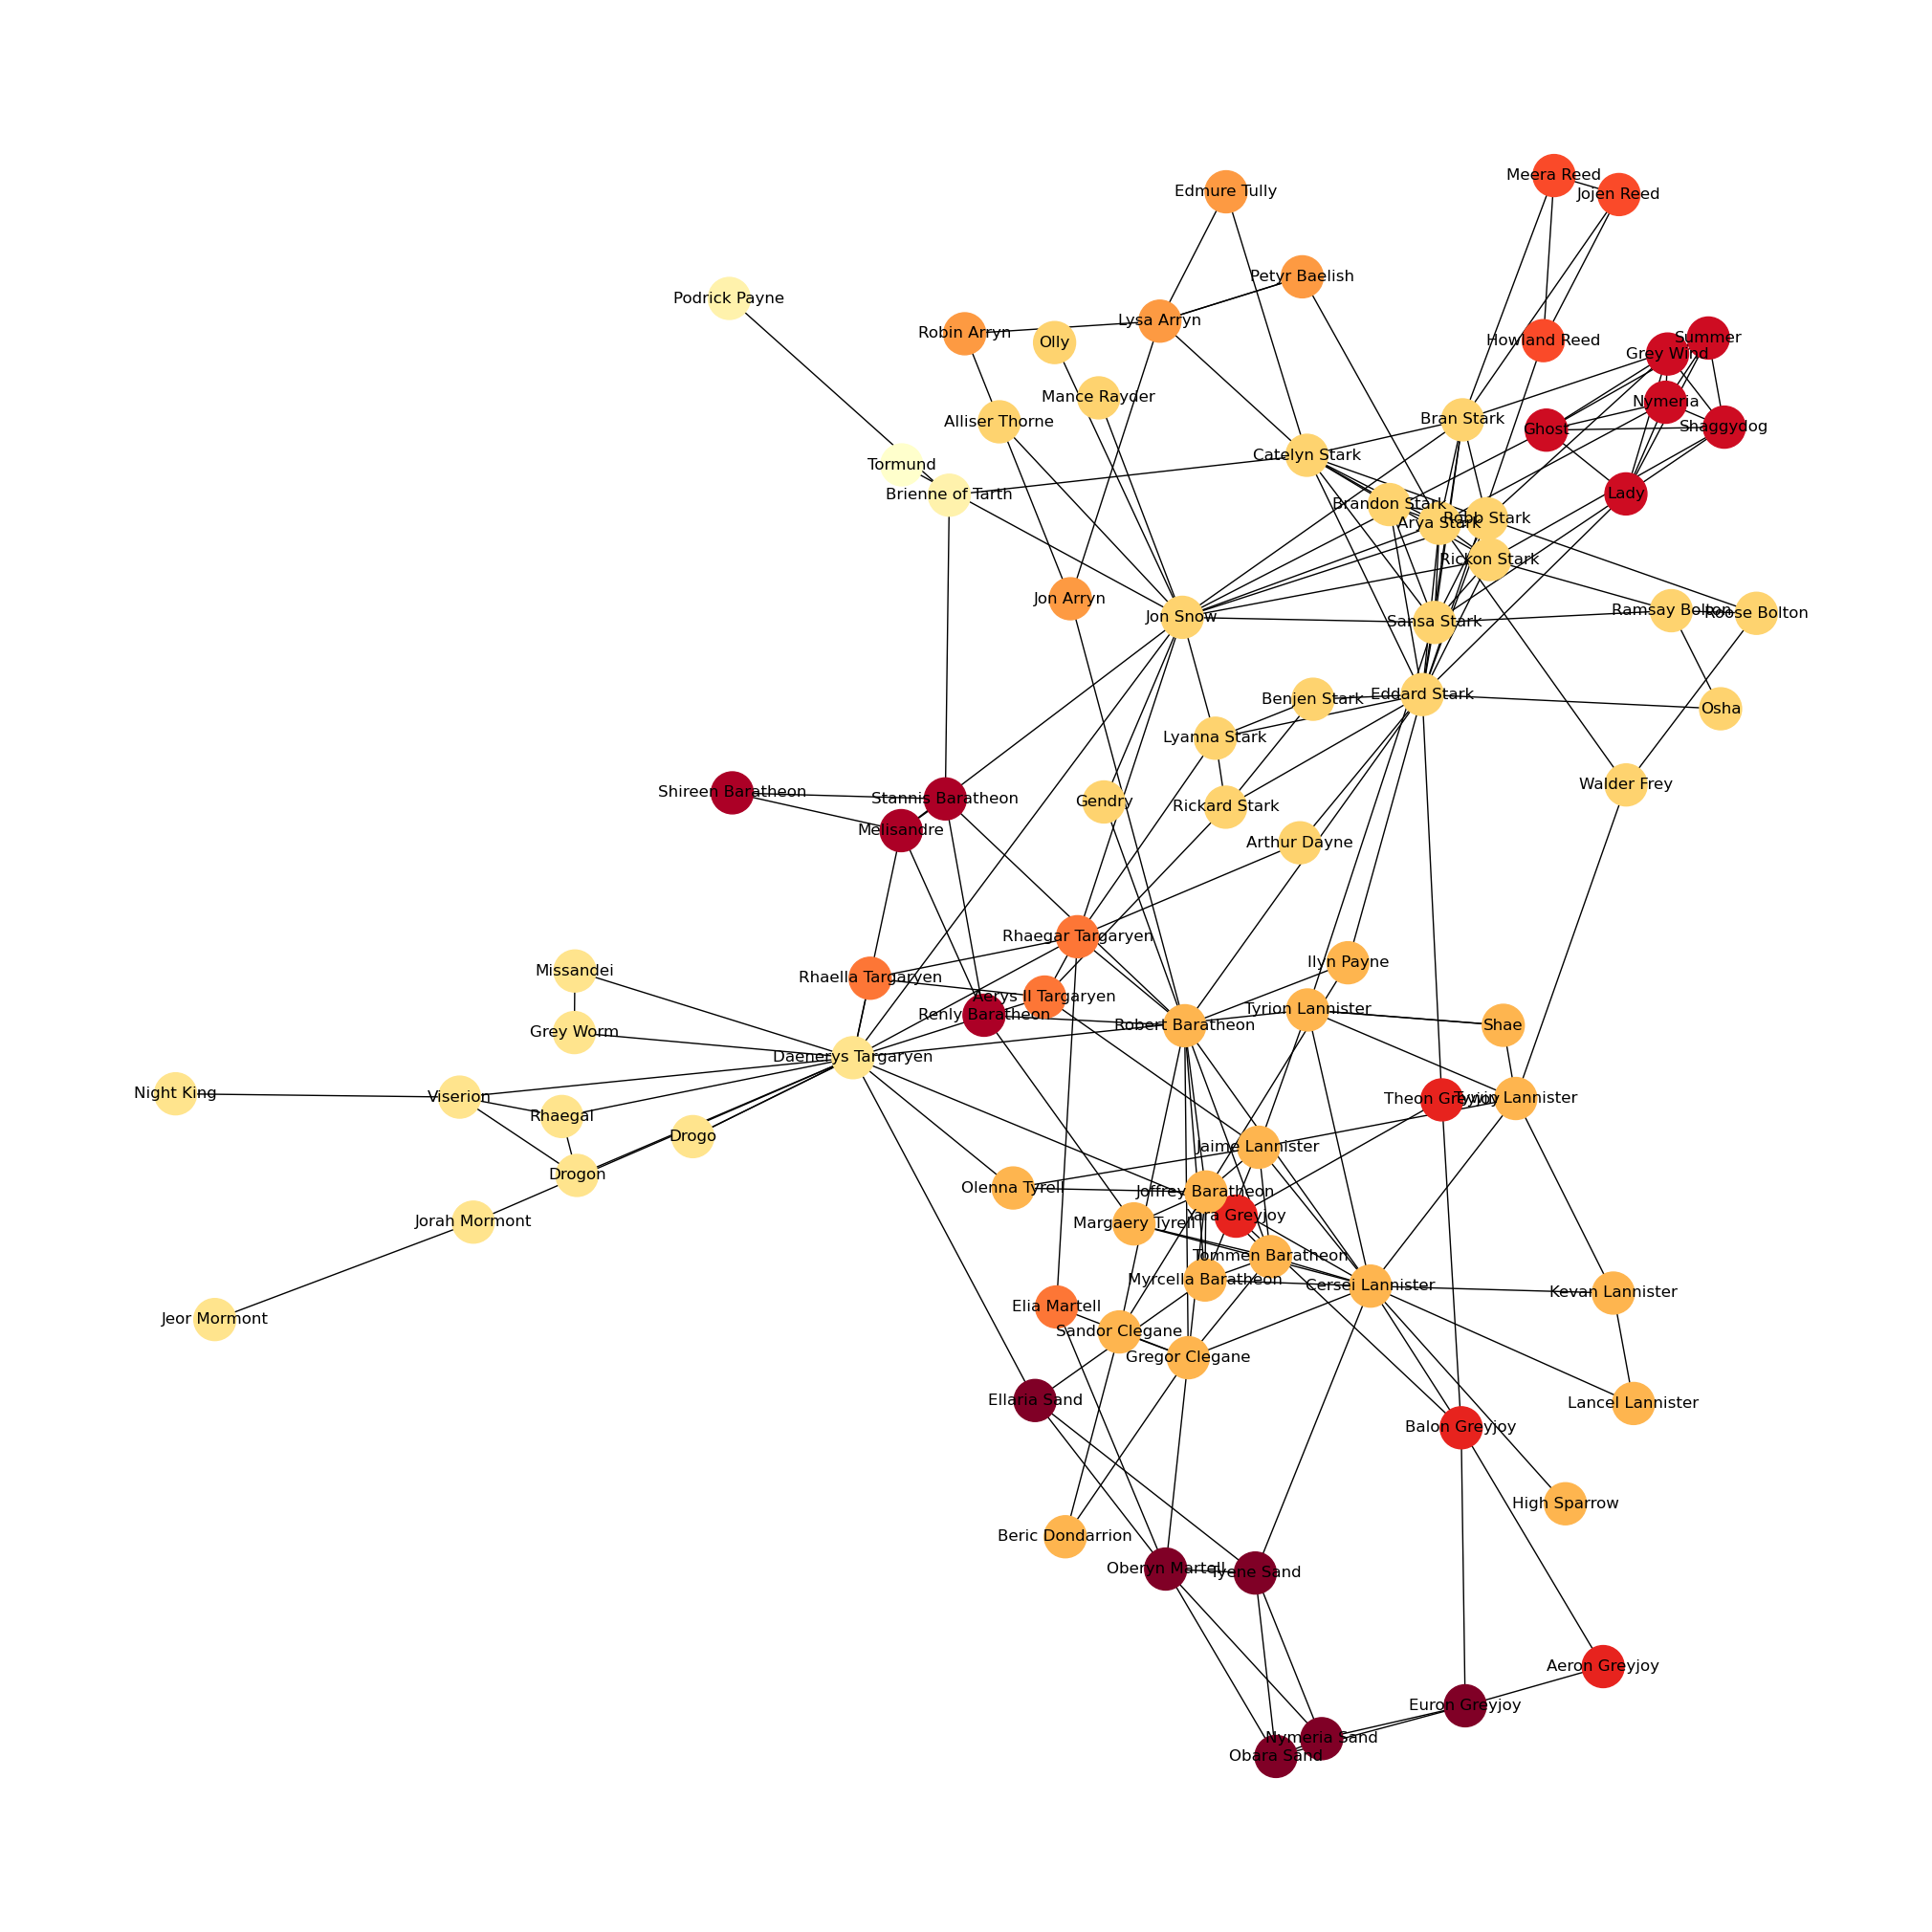

In [101]:
# LEAVE AS-IS

run_and_plot("the entire graph", graph)

The best partition of the core of the graph has modularity 0.5222 and 3 communities


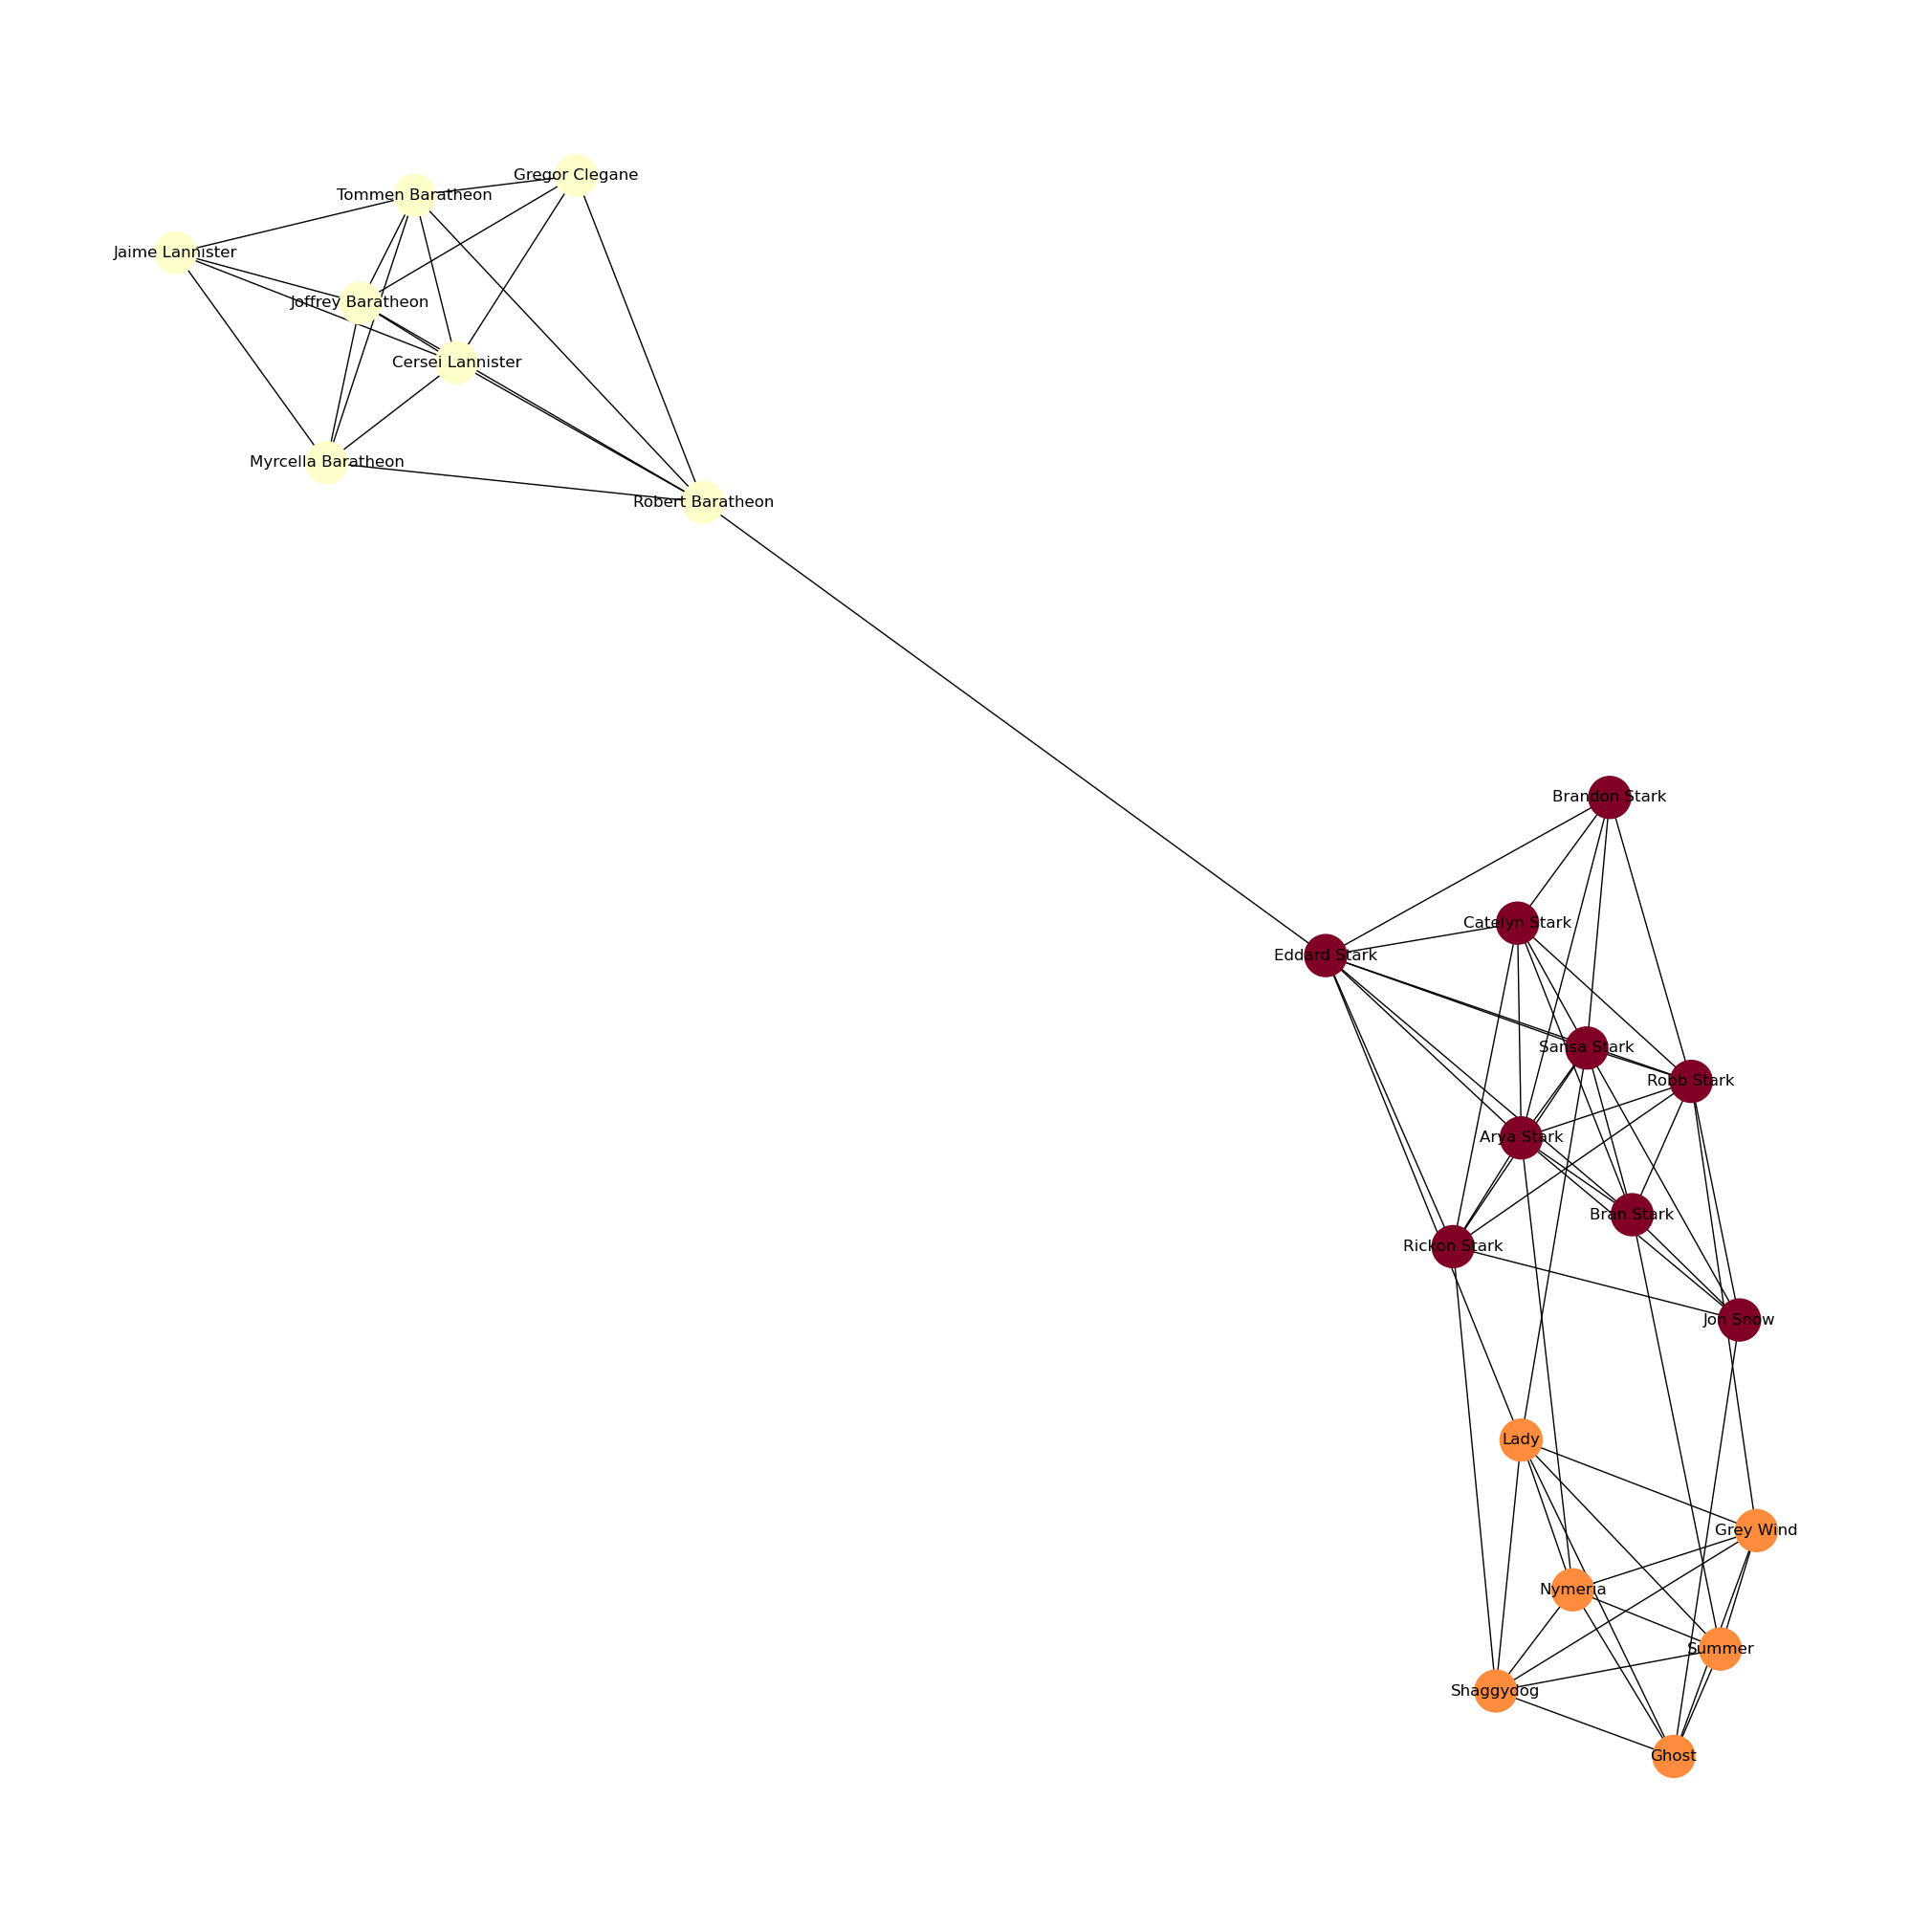

In [102]:
# LEAVE AS-IS


run_and_plot("the core of the graph", graphcore)

<font size="+1" color="blue">En aquest darrer graf, puc observar que hi han dos particions tal com s'indica. En una de les comunitats (a la que hi ha la família Stark) podem observar que hi han dues subcomunitats molt ben interconnectades entre elles dues, i en què cada enllaç pot representar o bé un matrimoni o bé que algú a matat a l'altre. Quan comencem a fer particions i a trobar els k-cores, les dues comunitats quedaran incomunicades entre elles, en el  2-core, ja que només les connecta un enllaç. A mesura que avancem amb el k-core, s'aniran eliminant els nodes que tinguin menys relació entre ells, mentre's que els nodes més importants (els personatges principals) tardaran més a ser eliminats i tindran k-core més alt </font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>